# SI simulation on mail temporal network

### Import libraries

In [114]:
import networkx as nx
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import copy

# import utily functions
import network_utils as utl


%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (12, 6)

# set random seed for repeating experiments
random.seed(10)

In [115]:
# name of the network file
file_name = "comm-linux-kernel-reply.edges" 

## Read the network

### Explore the Network File
Before actually reading the network, let's visualize how the file containing the network data is structured:

In [117]:
# open file in read mode
with open(file_name, "r") as f:
    # read and print first 15 lines of the file
    for i in range(15):
        line = f.readline()
        print(line)

% asym positive

%This is the communication network of the Linux kernel mailing list. 

% Nodes are persons (identified by their email addresses), and each directed edge represents a reply from a user to another.

33	33	1	1138206644

33	28	1	1138211184

33	28	1	1138213453

28	2	1	1138215043

28	58	1	1138218253

2	58	1	1138218253

58	59	1	1138220449

59	16	1	1138225156

16	59	1	1138227964

59	60	1	1138233190

16	33	1	1138289283

59	33	1	1138290914



From the above output we can see that the file contains the edges of a communication network of the Linux kernel mailing list. <br> In particular, nodes are persons (identified by their email addresses), and each directed edge represents a reply from a user to another. The last column represents the timestamp of the mail exchange between two users. <br>
Therefore, the network of interest is a TEMPORAL and DIRECTED network that represents the exchange of mails over time between nodes that represent persons. Notice that the third column represents the weight of each edge.

To better understand the network and obtain some more insights, lets visualize the source nodes, destination nodes and the timestamp ranges:

In [118]:
source_nodes = [] # list with the source nodes
destination_nodes = [] # list with the destination nodes
time_stamps = [] # list with the timestamps
comment="%" # start char of comment lines
delim="\t" # delimiter char

# read file and store nodes and timestamps
with open(file_name, "r") as f:
    for l in tqdm(f):
        # Skip comment lines
        if l[0] != comment:
            
            # put edge data into a list of integers
            data = list(map(int, l.strip().split(delim)))
            
            # append to lists
            source_nodes.append(data[0])
            destination_nodes.append(data[1])
            time_stamps.append(data[3])

1096443it [00:02, 508260.79it/s]


In [119]:
print("Total number of edges: {}".format(len(source_nodes)))
print("Total number of source nodes: {}".format(len(set(source_nodes))))
print("Total number of destination nodes: {}".format(len(set(destination_nodes))))
print("NUmber of different timestamps: {}".format(len(set(time_stamps))))

Total number of edges: 1096440
Total number of source nodes: 25089
Total number of destination nodes: 25212
NUmber of different timestamps: 881701


It may be interesting to better understand the range of node ids:

In [120]:
# All the nodes of the net
nodes_set = set(source_nodes).union(set(destination_nodes))

In [121]:
# Total number of nodes (persons) in the network
len(nodes_set)

27927

We can print the (sorted) set of all the nodes:

In [123]:
sorted(nodes_set)[0], sorted(nodes_set)[-1]

(1, 63399)

It seems that node identifiers start from 1 up to 63399, but the number of total nodes is 27927, therefore some identifiers are simply not present.

In [124]:
# Visualize the set of source nodes
len(set(source_nodes))

25089

In [125]:
# Visualize the set of destination nodes
len(set(destination_nodes))

25212

We can now take a look at the timestamps:

In [126]:
time_stamps_set = sorted(set(time_stamps))

It may be intersting to visualize the smallest and the highest timestamp value, as well as the distribution of timestamps, to better understand those with high mail exchange.

In [127]:
# min and max timestamps
timestamp_min = np.min(time_stamps_set)
timestamp_max = np.max(time_stamps_set)
timestamp_min, timestamp_max

(1136080607, 1388528616)

We could retrieve the date into a readable format:

In [129]:
from datetime import datetime

# first and last timestamps
datetime.fromtimestamp(timestamp_min).strftime('%Y-%m-%d %H:%M:%S'), datetime.fromtimestamp(timestamp_max).strftime('%Y-%m-%d %H:%M:%S')

('2006-01-01 02:56:47', '2013-12-31 23:23:36')

This allows us to understand that the network contains email exchanged during 8 full years, from 2006 to 2013, between 27927 users/mails.

### Read temporal and directed network
We'll now read the network by using the networkx function 'read_edgelist', which allows to read directly the .EDGES file specifying some additional arguments as explained in the documentation (PUT LINK). In particular, we'll add to each edge an attribute encoding its weight and another atttribute encoding the timestamp. We therefore read the network as a Directed Network with Multiple edges.

In [130]:
g = nx.read_edgelist("comm-linux-kernel-reply.edges", comments="%", delimiter="\t", create_using = nx.MultiDiGraph(), data=(("weight", int), ("timestamp", int)))

Let's check the correct reading of the networK:

In [131]:
print(g)
# check if directed and if weighted
print(nx.is_directed(g), nx.is_weighted(g))

MultiDiGraph with 27927 nodes and 1096440 edges
True True


In [ ]:
# to get list of edges with corresponding attributes
edges = list(g.edges.data())

In [133]:
# visualize first 100 edges
print(edges[1:50])

[('33', '33', {'weight': 1, 'timestamp': 1137777721}), ('33', '33', {'weight': 1, 'timestamp': 1137778200}), ('33', '33', {'weight': 1, 'timestamp': 1138386487}), ('33', '33', {'weight': 1, 'timestamp': 1136909626}), ('33', '33', {'weight': 1, 'timestamp': 1140713637}), ('33', '33', {'weight': 1, 'timestamp': 1143771296}), ('33', '33', {'weight': 1, 'timestamp': 1143771296}), ('33', '33', {'weight': 1, 'timestamp': 1143820149}), ('33', '33', {'weight': 1, 'timestamp': 1143820214}), ('33', '33', {'weight': 1, 'timestamp': 1143820215}), ('33', '33', {'weight': 1, 'timestamp': 1143823216}), ('33', '33', {'weight': 1, 'timestamp': 1143581727}), ('33', '33', {'weight': 1, 'timestamp': 1143584883}), ('33', '33', {'weight': 1, 'timestamp': 1143589499}), ('33', '33', {'weight': 1, 'timestamp': 1154384149}), ('33', '33', {'weight': 1, 'timestamp': 1163109248}), ('33', '33', {'weight': 1, 'timestamp': 1162565216}), ('33', '33', {'weight': 1, 'timestamp': 1166205845}), ('33', '33', {'weight': 1, 

We can clearly see that we have correclty read the network as a directed network with multiple edges and also with self-loops. <br>
What changes between directed edges between the same nodes is the timestamp of of the 'contact'/mail exchange between the nodes.

### Read the network as static
We may be interested in reading the network as a static one, without taking into account the timestamps. 
Let's define an auxiliary function for doing that. <br>
<b>Important remark</b>: if a directed edge appears into two different timestamps, we'll increase the weight by one, without considering the case of multiple edges.

Let's save this network for retrieving it without the need of running the function

In [134]:
from simuation_utils import read_network_static_singular

In [135]:
g2 = read_network_static_singular(file_name)

1096443it [00:03, 308214.71it/s]


Let's inspect for correct reading:

In [136]:
print(g2)
print(nx.is_directed(g2), nx.is_weighted(g2))
#g2.get_edge_data(33, 28) # 33 has mumtiple conections with 28

DiGraph with 27927 nodes and 242976 edges
True True


{'weight': 4}

In [137]:
# get list of edges with corresponding attributes
edges2 = list(g2.edges.data())

In [138]:
# visualize first 100 edges
print(edges2[1:20])

[(33, 28, {'weight': 4}), (33, 52, {'weight': 1}), (33, 3, {'weight': 3}), (33, 44, {'weight': 1}), (33, 16, {'weight': 3}), (33, 13, {'weight': 1}), (33, 30, {'weight': 2}), (33, 761, {'weight': 1}), (33, 18, {'weight': 1}), (33, 74, {'weight': 4}), (33, 804, {'weight': 2}), (33, 58, {'weight': 3}), (33, 1186, {'weight': 5}), (33, 94, {'weight': 3}), (33, 22, {'weight': 4}), (33, 73, {'weight': 1}), (33, 120, {'weight': 1}), (33, 605, {'weight': 1}), (33, 115, {'weight': 3})]


As clearly shown above, we have now read the network as a directed one, without timestamps and with a weight equal to the cardinality of edges.

A further possibility is to read the network as an undirected one

We could check whether the graph is connected or not, in this case we may check for the "strong connectivity", which states that a directed graph is strongly connected if and only if every vertex in the graph is reachable from every other vertex.

In [139]:
# check strong connectivity
nx.is_strongly_connected(g2)

False

From the above, we clearly understand that the network is not strongly connected. <br>
We can now check whether the graph is "weakly connected", i.e. if it is connected when the direction of the edge between nodes is ignored.

In [140]:
nx.is_weakly_connected(g2)

False

The graph is not weakly connected.<br>
Let's get the biggest weakly connected component:

In [141]:
def get_biggest_weakly_connected_component(g):
    biggest_comp_nodes = max(nx.weakly_connected_components(g), key=len)
    return g.subgraph(biggest_comp_nodes)

In [142]:
biggest_weakly = get_biggest_weakly_connected_component(g2)
print(biggest_weakly)

DiGraph with 24567 nodes and 239825 edges


In [147]:
#biggest_weakly.edges.data()

In [144]:
from simuation_utils import get_biggest_weakly_connected_component

In [145]:
biggest_strongly = get_biggest_strongly_connected_component(g2)
print(biggest_strongly)

DiGraph with 18531 nodes and 230721 edges


In [148]:
#biggest_strongly.edges.data()

### Network properties

In [ ]:
def get_network_summary(G):
    net_desc = {"name":G.name}

    # Compute all descriptors
    net_desc['n_nodes'] = G.number_of_nodes()
    net_desc['n_edges'] = G.number_of_edges()
    
    degrees_values = [val for key,val in G.degree()] # degree for each node
    net_desc['min_deg'] = np.min(degrees_values)
    net_desc['max_deg'] = np.max(degrees_values)
    net_desc['avg_deg'] = round(np.mean(degrees_values), 4) # 4 decimal digits

    net_desc['avg_clust'] = round(nx.average_clustering(G, weight = 'weight'), 4)
    net_desc['assortativity'] = round(nx.degree_assortativity_coefficient(G, weight = 'weight'), 4)
    
    # since the net is not connected, we consider the average_shortest_path_length of the biggest weakly connecte subgraph
    net_desc['avg_path_len'] = round(nx.average_shortest_path_length(get_biggest_weakly_connected_component(G), weight = 'weight'), 4)
    net_desc['diameter'] = nx.diameter(G)
    
    return net_desc

In [ ]:
print(get_network_summary(g2))

## Plots and distributions

We'll use the plotting functions defined in the 'network_utils.py' Python file

### Degree distribtution histograms
Log-log and linear

In [ ]:
degrees = [g2.degree(n) for n in g2.nodes()]
n_bins = 30 # number of bins to use

#### PDF histograms

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
utl.plot_linear_PDF(g2, name='', nbins = n_bins)
plt.subplot(1, 2, 2)
utl.plot_loglog_PDF(g2, name="", nbins = n_bins)

#### CCDF histograms

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
utl.plot_linear_CCDF(g2, name="", nbins=n_bins)
plt.subplot(1, 2, 2)
utl.plot_loglog_CCDF(g2, name="", nbins = n_bins)

From the above plots we can see that the network follows a powerlaw degree distribution (scale-free network). To better understand it we'll now estimate it's exponent and plot the theorical distribution line

### Estimation of the exponent for the empirical degree distribution

We'll use the MLE estimation of the exponent.

* We can use the <i>powerlaw</i> Python package described here: https://arxiv.org/abs/1305.0215, which is based on a MLE of the exponent of a powerlaw distribution . <br>
As described in the paper https://arxiv.org/abs/0706.1062, the <i>powerlaw</i> package performs the exponent estimation by following the formula 3.7 of the paper. <br>
According to the paper, the first step to perform a maximum likelihood fit to a powerlaw is to determine what portion of the data to fit. A heavy-tailed
distribution's interesting feature is, indeed, the tail and its properties, so if the initial, small values of the data
do not follow a power law distribution we may opt to disregard them. The question is from what
minimal value xmin (Kmin) the scaling relationship of the power law begins. The methods described in the paper of Clauset et al. mentioned above find this optimal value of xmin by creating a powerlaw fit starting from each unique value in the dataset, then selecting the one that results in the minimal Kolmogorov-Smirnov distance, D, between the data and the fit. Therefore the algorithm finds xmin my minimizing D. <br> <br>
* While the maximum likelihood fit to a continous power law can be calculated analytically,
and thus the optimal xmin and resulting fitted parameters can be computed quickly, this is not so for the discrete case. The maximum likelihood fit for a discrete power law is found by numerical optimization,
the computation of which for every possible value of xmin can take time. To circumvent this issue,
powerlaw can use an analytic estimate of gamma, from [https://arxiv.org/abs/0706.1062], which can "give results accurate to about 1% or
better provided xmin ≥ 6".




In [ ]:
!pip install powerlaw

In [ ]:
import powerlaw

degrees = [g2.degree(n) for n in g2.nodes()]
results = powerlaw.Fit(degrees, discrete = True)
print("\n\nExponent estimation:")
print(round(results.power_law.alpha, 4))
#print(results.power_law.xmin)

The above method gives us an estimated exponent of 1.7883, we'll now plot the theoretical distribution:

In [ ]:
plt.figure(figsize=(12,4))
plt.style.use('ggplot')
plt.subplot(1, 2, 1)
utl.plot_distrib_lin(graph=g2)
plt.subplot(1, 2, 2)
utl.plot_distrib_log(graph=g2, fit_line=True, gam=1.7883, expct_lo=3, expct_hi=50, expct_const=50)
plt.show()

### Plot the network

In [ ]:
nx.draw(g2)

## Communities

To better analyze and understand the considered network, we can apply some community detection algorithms for detecting communities.

## Implementation of a Susceptible-Infected (SI) disease spreading model
We'll now implement a SI spreading model on top of the considered <b>temporal</b> network, containing information about the timestamps of exchange of emails between users. <br>
We will perform a study of the dynamics of the spreading and how it depends on where the process starts as well as the infectivity of the disease. <br>
We'll then use static-network(i.e. consider the network as static) centrality measures to understand the roles played by specifing nodes. This will allow us to analyze the speed of spreading and other dynamics by taking into account some specific nodes.

### SI model
In a SI model, each node can assume a state that is either:
* Susceptible (S)
* Infected (I)

When an infected node gets in contact with a susceptible node, this last one may become infected with a probability p in [0,1], which indicates the infectivity of the disease. 
Notice that in the case of a mail network we consider a spam mail setting (detail better the process......). <br>
An important characteristics about the SI model is that infected nodes remain infected forever. <br><br>
In our specific temporal network, nodes are users (i.e. mails) and timestamped connnections represent exchange of mails between them. <br>
We'll take into consideration several hypoteses and perform different experiments:
* we'll consider an initial node (the <i>seed</i> node of the disease spreading) as the only infected node at the beginning, or we may also consider a group of nodes
Then, following the SI process, an email from an infected person (i.e. computer) may infect its susceptible destination with probability p in [0,1].
Infected nodes will remain infected for the rest of the simulation.

###  Read  the timestamped network for the simulation
In order to simplify the SI simulation, we'll now define an auxiliary function that reads the network in a convenient way for our taks:
* the following function (<i>'read_network_temporal'</i>) reads the edges from our network file and builds a dictionary data structure where keys are represented by timestamps (ordered in increasing order), and each key points to the list of edges/contacts between pair of nodes that exchanged a mail message in that specific timestamp.<br>

Because since Python 3.7+ dictionary keys are ordered, we will use a already ordered edges (by timestamp) files and store them in the same order.

In [150]:
from simuation_utils import read_network_temporal

In [151]:
td, nodes = read_network_temporal(file_name)
n_nodes = len(nodes)

We can verify the correct building of the dictionary by counting the number of keys which should be 881701 according to the previous analyisis.

In [152]:
len(td.keys())

881701

In [158]:
# print the dictionary
print([(k,v) for k,v in td.items()][:10])

[(1138206644, [(33, 33)]), (1138211184, [(33, 28)]), (1138213453, [(33, 28)]), (1138215043, [(28, 2)]), (1138218253, [(28, 58), (2, 58)]), (1138220449, [(58, 59)]), (1138225156, [(59, 16)]), (1138227964, [(16, 59)]), (1138233190, [(59, 60)]), (1138289283, [(16, 33)])]


In [ ]:
# set of nodes
nodes

Check if keys are ordered by timestamp value:

In [80]:
ts = list(td.keys())

In [81]:
# using all() to 
# check sorted list 
flag = 0
if(all(ts[i] <= ts[i + 1] for i in range(len(ts)-1))):
    flag = 1
flag

0

The dictionary is not sorted by timestamps, we therefore need to sort it:

In [82]:
td = dict(sorted(td.items()))

In [ ]:
td

Check again if sorted:

In [85]:
ts = list(td.keys())
# using all() to 
# check sorted list 
flag = 0
if(all(ts[i] <= ts[i + 1] for i in range(len(ts)-1))):
    flag = 1
flag

1

We have now everything ready for performing our SI simulations

### Simulation loop

In [ ]:
def random_group(possible_states, probabilites):
    """Randomly return a certain state from possible_states
    based on a set of probabilities of which the sum must be 1
    """
    assert sum(probabilites) == 1.0

    choices = []

    for i, st in enumerate(possible_states):
        choices += [st]*int(probabilites[i] * 10)
    
    return np.random.choice(choices)

In [ ]:
def simulation_step(tx_state, rx_state, rx_inf_prob):
    """Apply one step of the simulation to the nodes, based on their state (Infected or not)
    and on the reciever infection probability rx_inf.
    Return the new state and a int equals to 1 if the state has changed, 0 otherwise

    TODO: In case of implemting SI with Recovery (SIR), then choice must be -1 if recovery 
    and 1 for infection (for simulation_loop)
    """
    if tx_state and not rx_state:
        choice = np.random.binomial(1, rx_inf_prob)
        return bool(choice), choice
    else:
        return rx_state, False

    #return np.random.binomial(1, rx_inf_prob) if tx_state and not rx_state else rx_state

In [ ]:
def simulation_loop(time_dict, states, n_nodes, inf_prob):
    """Applies an SI simulation based on the contact made at each timestamp.
    Returns an array containing the evolution of the rho factor at each timestamp.

    TODO: Add the support for different probabilities depending on the group of the node
    """
    rho_list = np.zeros(1+len(time_dict)) # Initial rho + one rho per timestep
    
    for i, t in enumerate(time_dict.keys()):
        # For each contact

        # To speed up rho calculations, we'll keep track of the number of infected by monitoring
        # if the state of nodes changed. If they went to infected, we add one to the previously 
        # saved rho.
        temp_rho = 0
        for contact in time_dict[t]:
            states[contact[1]], changed = simulation_step(states[contact[0]], states[contact[1]], inf_prob)

            temp_rho += changed
        
        # We always sums the changed as there is no recovery (cf. TODO about SIR in simulation_step)
        rho_list[i+1] = rho_list[i] + temp_rho
    
    return rho_list/(n_nodes+1)

In [ ]:
# Simple case: only one group, random selection of initial infected (0 or 1)
states = dict(zip(nodes, np.random.binomial(1, 0.05, n_nodes)))

# More complicated : Case with different groups
grps = (1, 2, 3)
probs = (0.1, 0.4, 0.5)
#states = dict(zip(nodes, [random_group(grps, probs) for _ in range(n_nodes)]))

rhos = simulation_loop(td, states, n_nodes, 0.3)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(td.keys(), rhos)

In [86]:
import simulation_SI from simulation_utils

Create dictionary of infected time for each node id:

In [87]:
seed = [1, 2, 5] # list of seed nodes
rho_, infection_times = simulate_SI(td, seed, nodes, n_nodes, 0.2)

print(rho_[:50])

[0.00010742 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742
 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742
 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742
 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742
 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742
 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742
 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742
 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742 0.00010742
 0.00010742 0.00010742]


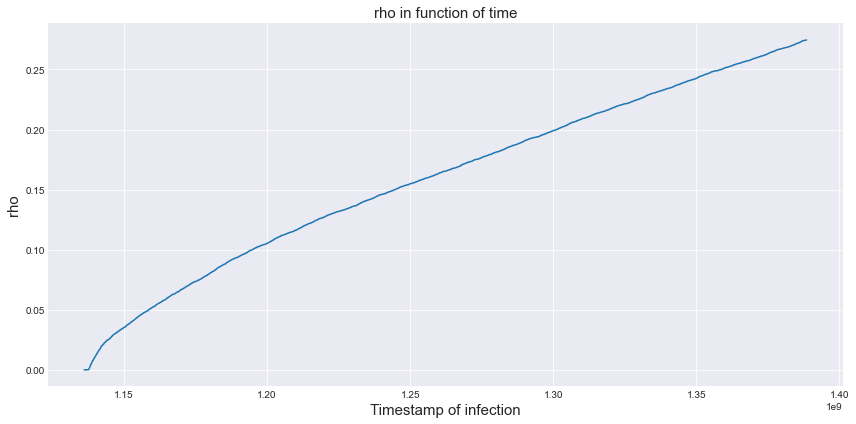

In [90]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(td.keys(), rho_)
plt.title("rho in function of time", fontsize=15)
plt.xlabel("Timestamp of infection", fontsize=15)
plt.ylabel("rho", fontsize=15)
plt.tight_layout()

We can plot the time of infection also in this way:

In [ ]:
#d = {1:3, 3:6, 5:10}

In [ ]:
#a = {k-1:v for (k,v) in d.items()}
#a

In [91]:
ts_from_zero = [(k - timestamp_min) for k in td.keys()]

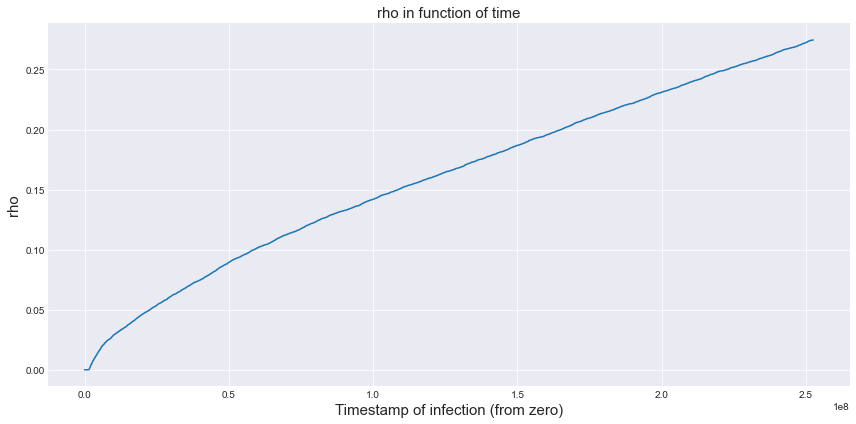

In [92]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(ts_from_zero, rho_)
plt.title("rho in function of time", fontsize=15)
plt.xlabel("Timestamp of infection (from zero)", fontsize=15)
plt.ylabel("rho", fontsize=15)
plt.tight_layout()

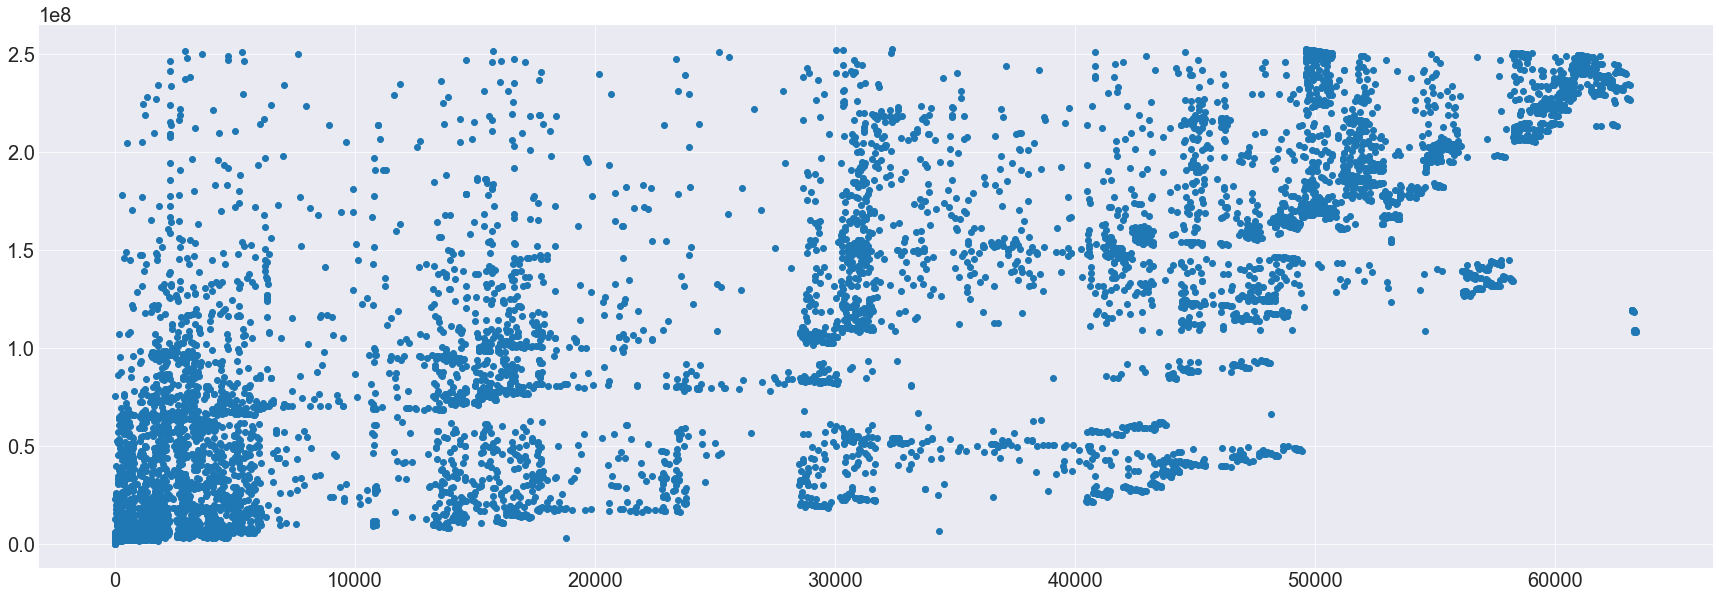

In [98]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.rcParams.update({'font.size': 20})
infection_times_from_zero = [(v- timestamp_min) for v in infection_times.values()]
plt.scatter(sorted(nodes),infection_times_from_zero)

Let's now run multiple  SI simulations and average the results to reduce the variance due to the p parameter:

In [101]:
from simuation_utils import run_multiple_simulations

In [100]:
rho = run_multiple_simulations(20, td, seed, nodes, n_nodes, 0.3)

100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


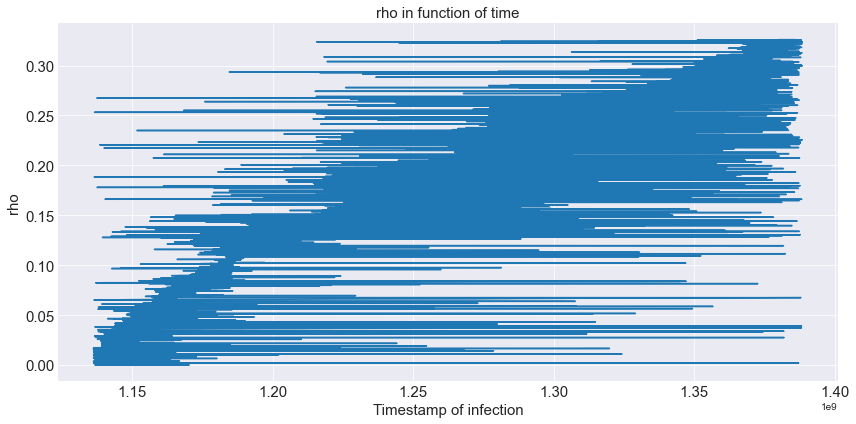

In [162]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(td.keys(), rho)
plt.title("rho in function of time", fontsize=15)
plt.xlabel("Timestamp of infection", fontsize=15)
plt.ylabel("rho", fontsize=15)
plt.tight_layout()

# EXPERIMENTS

Fix the seed nodes

--->What happens if p=1, i.e. the infection is always transmitted
--->if node x is infected at the beginning of the spreading, at which time node y will become infected? (Show exact time stamp)


---> Effect of infection probability p on spreading speed: run the SI simulation model (e.g. 20 times) with each of the infection probabilities [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0] and plot the rho curves together (start from the same seed node)
    For which of the probabilities we obtain the highest infection percentage? Compare times of infection

---> Study the effect of the seed node selection on spreading speed (obviusly fix p and run simulation e.g. 20 times for each seed node)
    Spot differences in the spreading speed (you should spot them at the beginning of the pandemic)
   

Run the SI model 50 times with p=0.5 using different random nodes as seeds and record the MEDIAN infection time for each node.
--> Create scatter plots showing the median infection time of each node as a function of:
        - (unweighted)clustering coefficient c
        - degree k
        - strength 
        - (unweighted) betweenness centrality
This will allow to spot correlations between infection times and various coefficients

??? Use the Spearman rank-correlation coefficient (availble in scipy) for finding out which of the measures is the best predictor for the infection times

Based on the above results, which measure(s) would you use to pick the place to hide, i.e. whihc measure best predicts the infection time? Why?
Why betweenness centrality behaves differently than degree and strength
Why clustering coeff is a poor predictor

In order to prevent the disease from spreading to the whole email net, you may immunize some nodes.
---> compare diffrent strategies:
        -- immunization of random nodes
        -- immunization of nodes with the largest values of the four measures of centrality/importance used above
        (use e.g. p = 0.5 and average the results over 20 runs of the model for each immunization strategy)
        N.B. To reduce the variance due to selection of seed nodes, use same seed nodes for investigating all immunization strategies. (first select your immunized nodes, and then select 20 random seed nodes such that none of them belongs to the group of immunized nodes in any of the five different strategies)
        
---> Plot the prevalence(rho) of the disease as a function of time for the 5 different immunization strategies, always immunizing 10 nodes.

RESULTS:
- Which of the immunization strategies performs the best, and why?
- Why betweenness centrality performs better as an immunization strategy than as a predictor of safe hiding place=

Analyze the role of links:
adapt the code to record the number of times that each link transmits the disease to another node. We can do this by simply storing for each node form which other node it obtained the infection.

Run 20 simulations using random nodes as seeds and p = 0.5. For each simulation, record
which links are used to infect yet uninfected nodes (either by first infection-carrying
mails(edges) arriving to susceptible nodes or by infecting edges(mails) arriving before the already
recorded infection time)
Run the simulations, and compute the fraction of times that each link is used for
infecting the disease (fij )

Create scatter plots showing fij as a function of the following link properties:
i) link weight wij
8
ii) unweighted link betweenness centrality ebij (edge betweenness centrality in
networkx)
Compute also the Spearman correlation coefficients between fij and the two link-wise
measures.

Further extension: change probability of infection making it proportional to the edge weight?????